In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
filepath="../input/diabetes-data-set/diabetes.csv"
data=pd.read_csv(filepath)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's first visualise whether the number of pregnancies affect the outcome

<AxesSubplot:title={'center':'Pregnancies vs Outcome'}, xlabel='Outcome', ylabel='Pregnancies'>

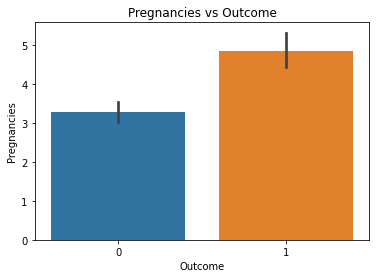

In [4]:
plt.title("Pregnancies vs Outcome")
sns.barplot(x=data["Outcome"],y=data["Pregnancies"])

The outcome tends to be positive for higher number of pregnancies. Let's move on to the next indicator!

<AxesSubplot:title={'center':'Glucose vs Blood Pressure'}, xlabel='Glucose', ylabel='BloodPressure'>

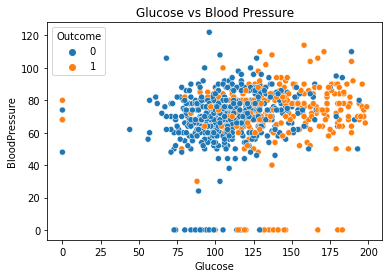

In [5]:
plt.title("Glucose vs Blood Pressure")
sns.scatterplot(data=data,x='Glucose',y='BloodPressure',hue='Outcome')

Higher glucose levels tend to indicate the outcome whereas blood pressure does not give a conclusive variation.

<AxesSubplot:title={'center':'Skin Thickness vs Insulin'}, xlabel='SkinThickness', ylabel='Insulin'>

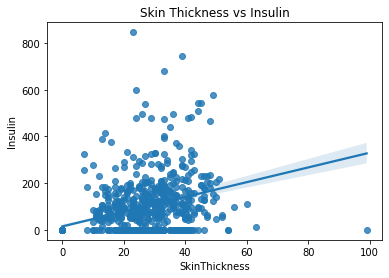

In [6]:
plt.title("Skin Thickness vs Insulin")
sns.regplot(data=data,x='SkinThickness', y= 'Insulin')

Skin thickness increases for higher levels of insulin

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Insulin vs Outcome'}, xlabel='Outcome', ylabel='Insulin'>

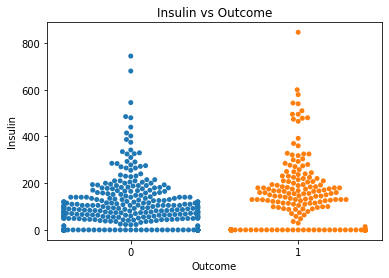

In [7]:
plt.title("Insulin vs Outcome")
sns.swarmplot(x=data['Outcome'],y=data['Insulin'])

Interesting! Let's see how BMI varies with age in the case of normal vs diabetes affected people

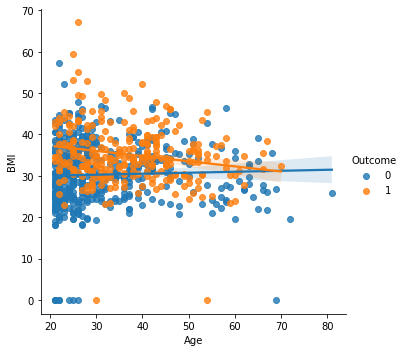

In [8]:
sns.lmplot(data=data,y='BMI',x='Age',hue='Outcome')

BMI tends to slightly decrease with age for diabetes patients

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

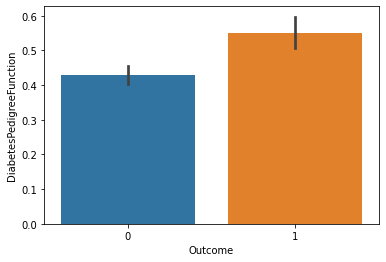

In [9]:
sns.barplot(x=data['Outcome'],y=data['DiabetesPedigreeFunction'])

Thus we see that higher values of Diabetes Pedigree Function strongly indicate the onset of diabetes. Now that we have understood the impact of the given features, let's create the model!

In [10]:
# importing required libraries for the model
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# viewing distribution of the data across both classes
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
# dividing into train and test sets
X=data.drop(columns='Outcome',axis=1)
y=data['Outcome']
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [13]:
# finding the best parameters
kernels=["linear","sigmoid",'rbf']
for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print("For kernel=",kernel,", accuracy is ",accuracy_score(y_pred,y_test))

For kernel= linear , accuracy is  0.7792207792207793
For kernel= sigmoid , accuracy is  0.7207792207792207
For kernel= rbf , accuracy is  0.7662337662337663


Thus we choose SVM with kernel=linear for diabetes prediction